# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***sklearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [4]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [14]:
print(iris.keys())
print(iris['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [29]:
# we only take the first two features. 
data = iris['data']

In [12]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
y = iris['target']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
#建立Target欄位與資料
target_df = pd.DataFrame(y, columns=['target'])
target_map = {
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
target_df['target'].map(target_map)
target_df.head(0)

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [41]:
#合併資料特徵欄位與目標欄位
data = x[['sepal length (cm)', 'sepal width (cm)']]
data = data.join(target_df)
data

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [43]:
#只選擇目標為0與1的資料
mask1 = data['target']==0
mask2 = data['target']==1
data = data[( mask1 | mask2)]
data

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


## 切分訓練集與測試集
> train_test_split()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(data[['sepal length (cm)', 'sepal width (cm)']], data['target'])

In [45]:
X_train.head()

,sepal length (cm),sepal width (cm)
88,5.6,3.0
29,4.7,3.2
46,5.1,3.8
8,4.4,2.9
14,5.8,4.0


In [46]:
X_test.head()

,sepal length (cm),sepal width (cm)
80,5.5,2.4
28,5.2,3.4
86,6.7,3.1
83,6.0,2.7
7,5.0,3.4


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [2]:
import numpy as np
import pandas as pd

c:\Users\EN\anaconda3\envs\NTUC\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\EN\anaconda3\envs\NTUC\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\EN\anaconda3\envs\NTUC\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [57]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu)/s[c]
    return df

In [58]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train[:5]

array([[ 2.05225635, -2.61573002],
       [ 0.64015336, -2.21081825],
       [ 1.26775468, -0.99608295],
       [ 0.16945236, -2.8181859 ],
       [ 2.36605701, -0.59117118]])

## use sklearn

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.44533333 3.13866667]
[0.63734728 0.49393477]


In [60]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 0.24267251, -0.28073883],
       [-1.16943048,  0.12417294],
       [-0.54182915,  1.33890824],
       [-1.64013147, -0.48319471],
       [ 0.55647318,  1.74382001]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [61]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 0.08577218 -1.49547413]
 [-0.38492882  0.52908471]
 [ 1.96857617 -0.07828294]
 [ 0.87027384 -0.88810648]
 [-0.69872948  0.52908471]
 [ 0.24267251 -0.48319471]
 [ 0.08577218 -1.29301824]
 [-0.85562981 -1.49547413]
 [ 2.1254765  -0.68565059]
 [-0.69872948  0.73154059]]


you can also use fit_transform method (i.e., fit and then transform)    

In [62]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.07550904 -1.46472119]
 [-0.54744056  1.06066017]
 [ 1.81221701  0.30304576]
 [ 0.71104348 -0.70710678]
 [-0.86206157  1.06066017]
 [ 0.08180146 -0.20203051]
 [-0.07550904 -1.21218305]
 [-1.01937207 -1.46472119]
 [ 1.96952752 -0.45456865]
 [-0.86206157  1.31319831]]


In [63]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.526376854406884
29.224942407377608


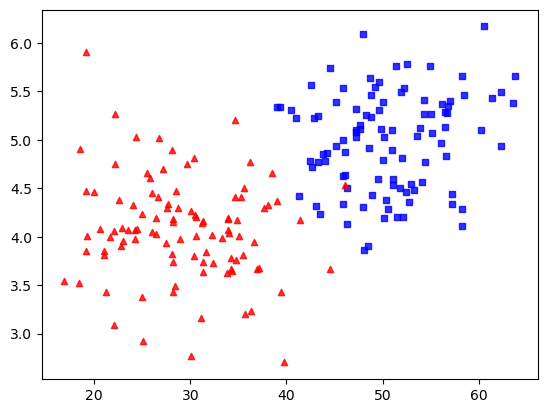

In [64]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [65]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [66]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [67]:
minmax_norm(x_val[:10])

array([0.7521376 , 0.74621731, 0.44199021, 0.63930204, 0.40937893,
       0.12549434, 1.        , 0.        , 0.49378751, 0.08473681])

In [68]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[63.80546585]
[[0.83638904]
 [0.83432026]
 [0.72801147]
 [0.7969599 ]
 [0.71661582]
 [0.6174155 ]
 [0.9230018 ]
 [0.57356289]
 [0.74611146]
 [0.60317323]]
